<a href="https://colab.research.google.com/github/asadali163/Time-Series-Experiments/blob/main/codebase/Stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O airline.csv https://lazyprogrammer.me/course_files/airline_passengers.csv

--2024-07-10 17:01:05--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline.csv’

airline.csv         100%[===================>]   1.99K  --.-KB/s    in 0s      

2024-07-10 17:01:05 (11.0 MB/s) - ‘airline.csv’ saved [2036/2036]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_csv('airline.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.shape

(144, 1)

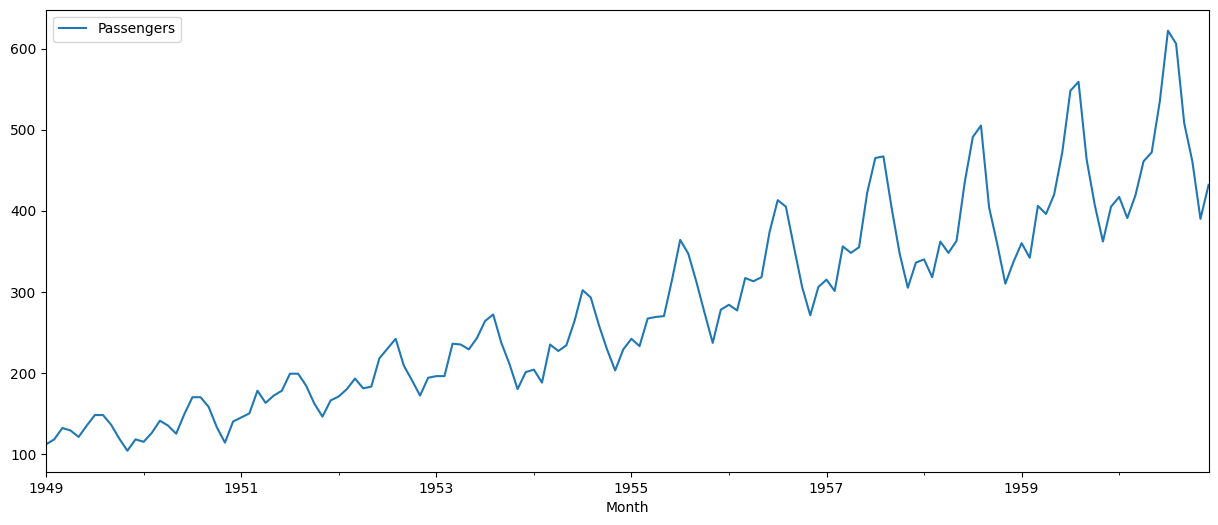

In [ ]:
df.plot(figsize=(15,6));

In [ ]:
adfuller(df['Passengers'])

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

##### Here the first value represent test hypothesis and the second value is p-value, that can be some thereshold.

In [ ]:
def adf(x):
  result = adfuller(x)
  print('Test Hypothesis: ', result[0])
  print("P-value: ", result[1])
  if (result[1] <= 0.05):
    print("Stationary")
  else:
    print("Non Stationary")

In [ ]:
adf(df['Passengers'])

Test Hypothesis:  0.8153688792060498
P-value:  0.991880243437641
Non Stationary


In [ ]:
adf(np.random.randn(100))

Test Hypothesis:  -9.768455235498251
P-value:  7.243113455719325e-17
Stationary


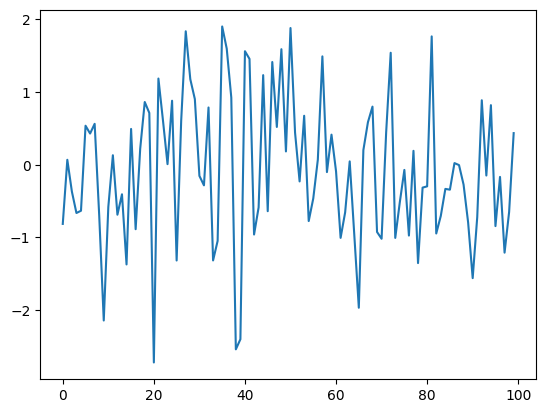

In [ ]:
pd.Series(np.random.randn(100)).plot();

##### Now lets see with log value and difference and log difference to check for stationarity

In [ ]:
df['Diff'] = df['Passengers'].diff()

<Axes: xlabel='Month'>

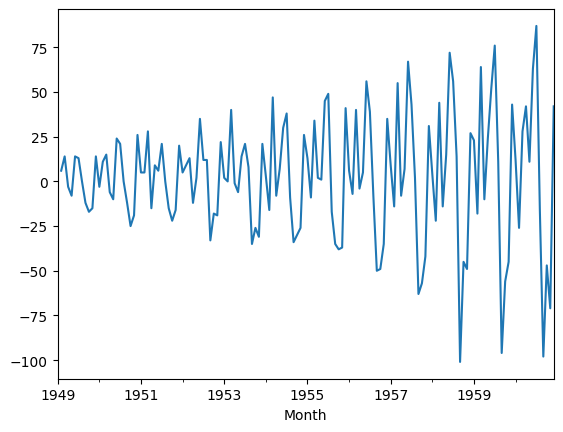

In [ ]:
df['Diff'].plot()

In [ ]:
adf(df['Diff'].dropna())

Test Hypothesis:  -2.8292668241700047
P-value:  0.05421329028382478
Non Stationary


<Axes: xlabel='Month'>

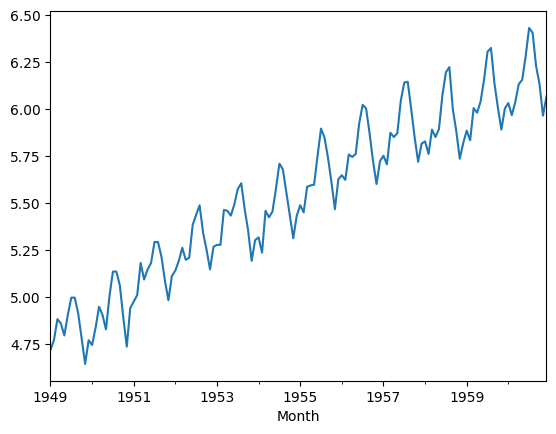

In [ ]:
df['LogPassengers'] = np.log(df['Passengers'])
df['LogPassengers'].plot()

In [ ]:
adf(df['LogPassengers'])

Test Hypothesis:  -1.7170170891069683
P-value:  0.4223667747703874
Non Stationary


In [ ]:
df['LogDifference'] = df['LogPassengers'].diff()

In [ ]:
adf(df['LogDifference'].dropna())

Test Hypothesis:  -2.717130598388114
P-value:  0.07112054815086184
Non Stationary


<Axes: xlabel='Month'>

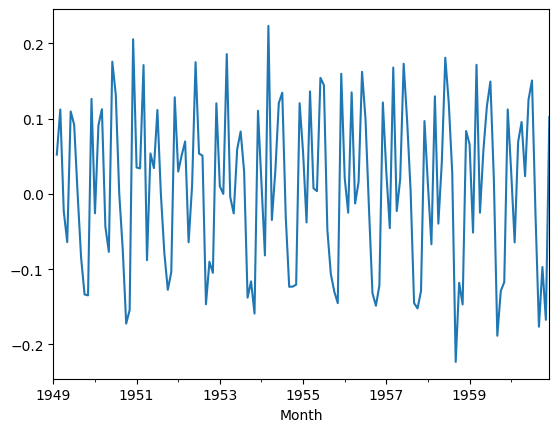

In [ ]:
df['LogDifference'].plot()